<a href="https://colab.research.google.com/github/AntonioWolf01/machine-learning-dse/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Dataset and Libraries**


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving your_dataset.csv to your_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron as SKPerceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore



In [ ]:
data = pd.read_csv('your_dataset.csv')

**Exploratory Data Analysis**

In [ ]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,1.205492,5.823226,98.837539,-1.075852,0.999205,0.911543,3.623558,-1.720267,-0.346191,-54.708330,-1
1,1.391530,3.611581,98.857197,-5.020318,0.677165,0.999492,3.413112,4.253865,2.041603,-54.317291,1
2,1.692571,-0.887019,100.901276,-0.595548,0.177550,-0.915495,4.320264,0.907834,3.126815,-56.397484,-1
3,4.289320,1.416843,100.784735,-2.897154,-0.066972,-0.786173,2.093003,1.336237,2.183829,-56.197728,1
4,0.542420,-1.010095,100.015580,-3.070705,0.088324,-0.242669,0.767942,-0.284683,-2.104145,-55.794045,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   x3      10000 non-null  float64
 3   x4      10000 non-null  float64
 4   x5      10000 non-null  float64
 5   x6      10000 non-null  float64
 6   x7      10000 non-null  float64
 7   x8      10000 non-null  float64
 8   x9      10000 non-null  float64
 9   x10     10000 non-null  float64
 10  y       10000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [ ]:
# Check for null values
null_values = data.isnull().sum()

# Check for duplicates
duplicates = data.duplicated().sum()

null_values, duplicates

(x1     0
 x2     0
 x3     0
 x4     0
 x5     0
 x6     0
 x7     0
 x8     0
 x9     0
 x10    0
 y      0
 dtype: int64,
 0)

In [ ]:
#Summary Statistics
data.describe()



,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.591298,0.515879,99.848936,-1.504139,0.077645,0.051823,0.975207,0.635194,0.051926,-55.447678,-0.001600
std,1.321185,2.054488,0.710948,1.133605,0.707270,0.704755,2.162237,2.212708,1.769646,0.710082,1.000049
min,0.002443,-7.524934,98.572455,-7.078939,-1.000000,-1.000000,-6.906971,-7.140755,-7.151890,-56.773931,-1.000000
25%,0.524758,-0.883862,99.159314,-2.179713,-0.624710,-0.644261,-0.500506,-0.879985,-1.129665,-56.137679,-1.000000
50%,1.276243,0.492813,99.802830,-1.262985,0.157145,0.101648,1.006918,0.624762,0.024726,-55.397208,-1.000000
75%,2.352106,1.902003,100.549141,-0.605316,0.777856,0.754770,2.434886,2.098389,1.248961,-54.758351,1.000000
max,9.384223,8.302375,101.260768,-0.000003,1.000000,1.000000,8.760306,9.287266,6.211452,-54.208890,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

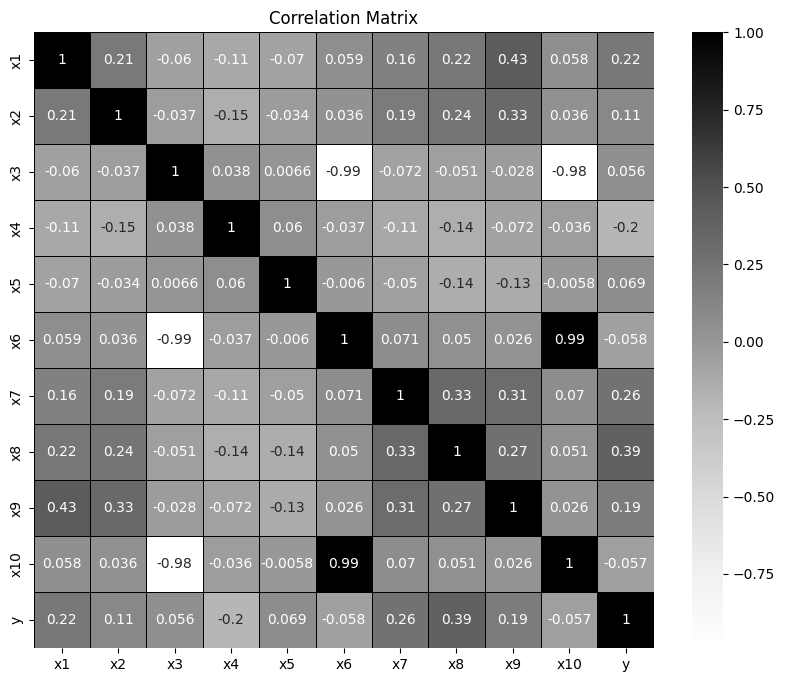

In [ ]:
#Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greys', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix')


Text(0.5, 0.98, 'Histogram for Numerical Columns')

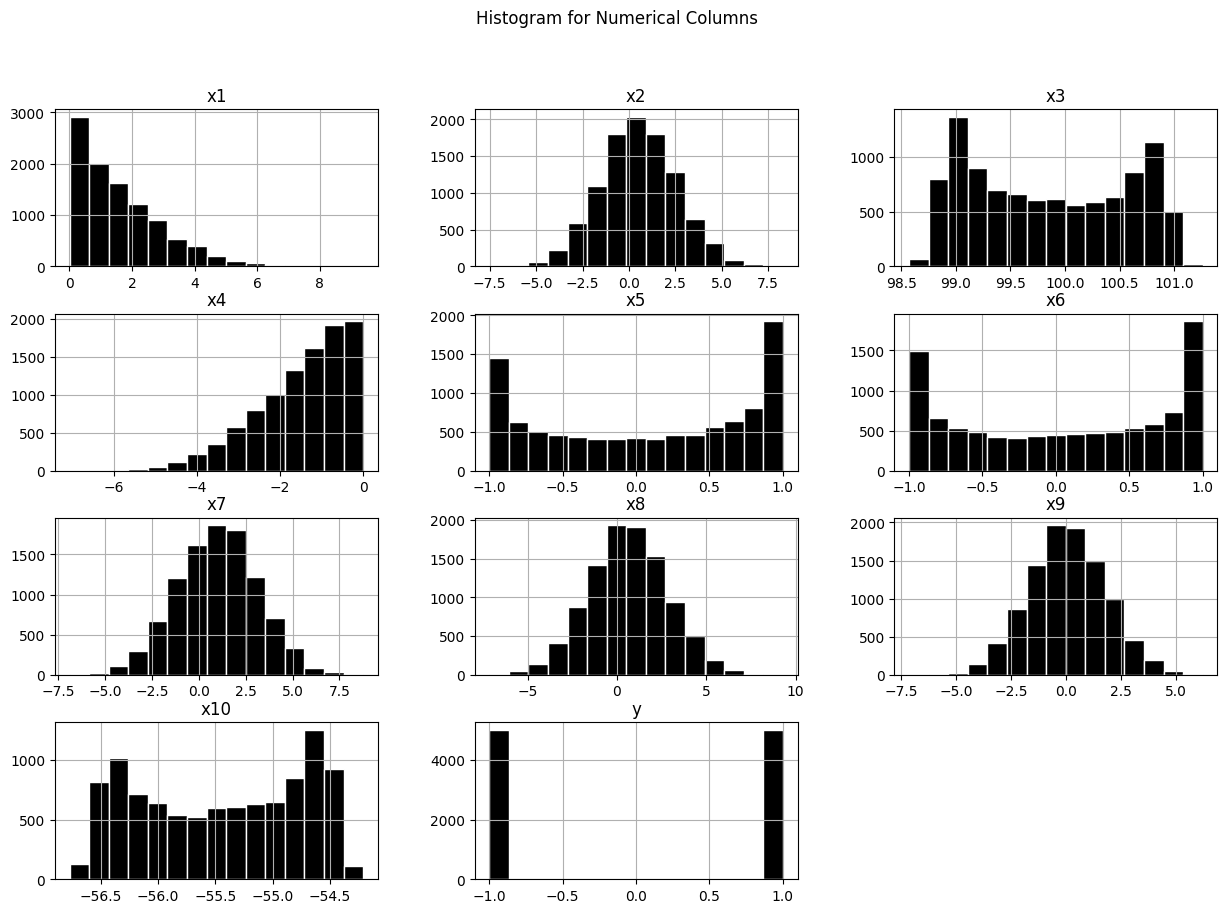

In [ ]:
#Distribution Analysis
data.hist(bins=15, figsize=(15, 10), edgecolor='white', color='black')
plt.suptitle('Histogram for Numerical Columns')


<ipython-input-26-c425cfe62522>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='gray', legend=False)


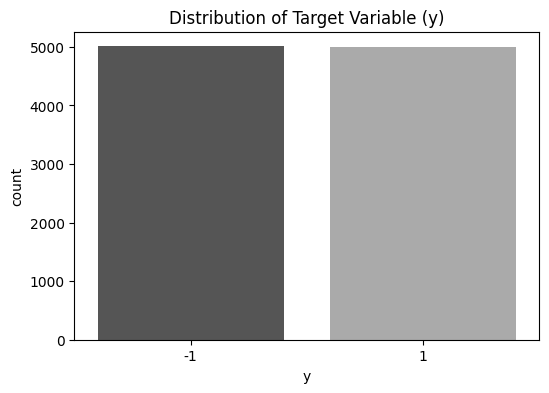

In [ ]:
#Categorical Analysis (Target Variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=data, palette='gray', legend=False)
plt.title('Distribution of Target Variable (y)')
plt.show()

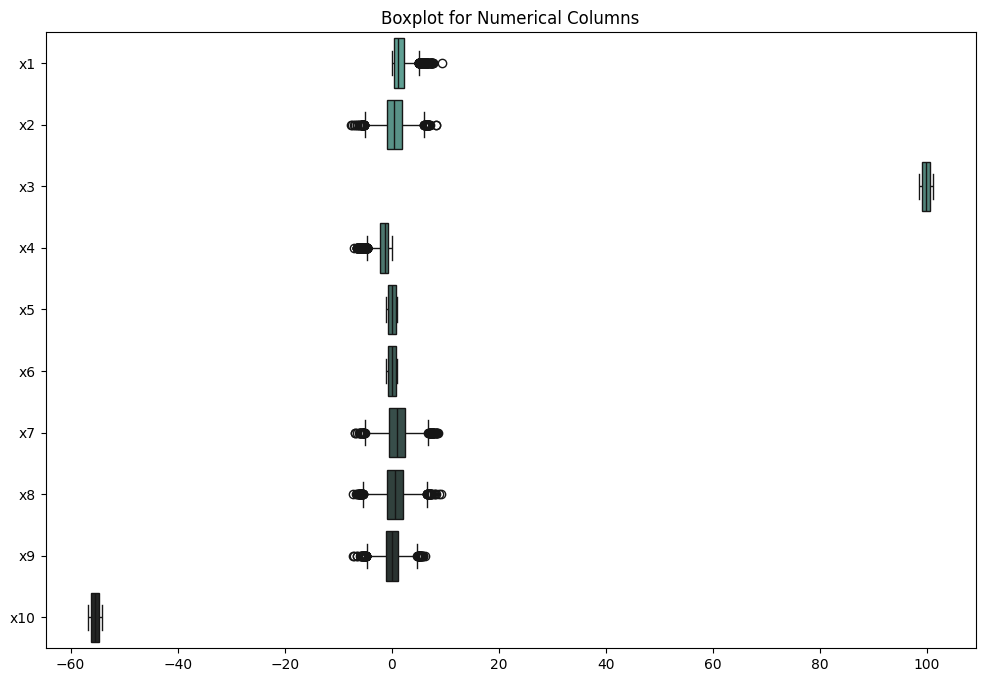

In [ ]:
#Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(columns=['y']), orient="h", palette="dark:#5A9_r")
plt.title('Boxplot for Numerical Columns')
plt.show()

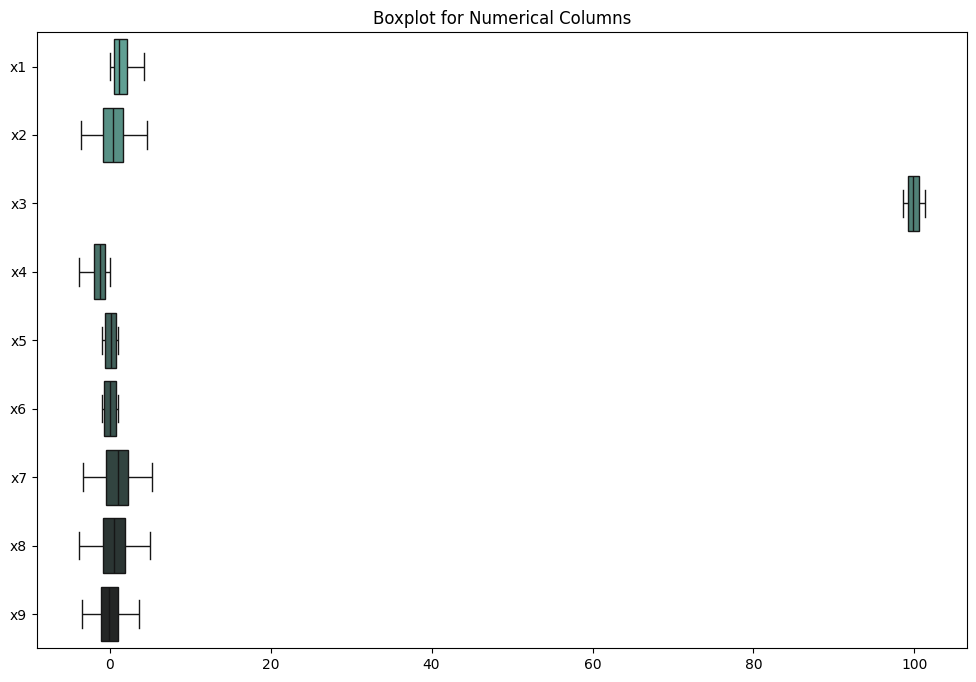

In [ ]:
#Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(columns=['y']), orient="h", palette="dark:#5A9_r")
plt.title('Boxplot for Numerical Columns')
plt.show()

**Preprocessing and Split**

In [ ]:
#Delete outliers considering a 3.3 z-score threshold
z_scores = data[['x1', 'x2', 'x4', 'x7', 'x8', 'x9']].apply(zscore)
data = data[(z_scores.abs() < 3.3).all(axis=1)]


NameError: name 'data' is not defined

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9842 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      9842 non-null   float64
 1   x2      9842 non-null   float64
 2   x3      9842 non-null   float64
 3   x4      9842 non-null   float64
 4   x5      9842 non-null   float64
 5   x6      9842 non-null   float64
 6   x7      9842 non-null   float64
 7   x8      9842 non-null   float64
 8   x9      9842 non-null   float64
 9   x10     9842 non-null   float64
 10  y       9842 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 922.7 KB


In [ ]:
data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
count,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000
mean,1.413443,0.427111,99.853206,-1.330977,0.099588,0.047477,0.943895,0.562947,-0.019354,-0.097883
std,1.062333,1.767205,0.711372,0.934228,0.706215,0.704506,1.886071,1.908475,1.514251,0.995262
min,0.003399,-3.590817,98.572455,-3.770925,-1.000000,-1.000000,-3.348050,-3.789738,-3.486178,-1.000000
25%,0.510968,-0.848017,99.162537,-1.963801,-0.601828,-0.647653,-0.433965,-0.819046,-1.085412,-1.000000
50%,1.204728,0.417759,99.811262,-1.158571,0.205491,0.091842,0.982587,0.539810,-0.036308,-1.000000
75%,2.132412,1.720068,100.552749,-0.561348,0.796774,0.751963,2.307519,1.900157,1.053858,1.000000
max,4.232231,4.624399,101.260768,-0.000003,1.000000,1.000000,5.294129,5.055909,3.589153,1.000000


In [ ]:
# Separate features and target
X = data.drop('y', axis=1)
y = data['y']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Check the dimensions of each dataset
print("Training set - X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("Test set - X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

# Check if the sum of training and test sets corresponds to the initial dataset
print("Total samples in the initial dataset:", len(data))
print("Total samples in the training set + test set:", len(X_train) + len(X_test))


Training set - X_train shape: (7896, 10) y_train shape: (7896,)
Test set - X_test shape: (1975, 10) y_test shape: (1975,)
Total samples in the initial dataset: 9871
Total samples in the training set + test set: 9871


**Linear Perceptron**

In [ ]:
#Perceptron algorithm
class Perceptron:
    def __init__(self, n_iterations=1000):
        self.n_iterations = n_iterations
        self.weights = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        y_ = np.where(y <= 0, -1, 1)

        for iteration in range(self.n_iterations):
            no_updates = True
            for idx in range(n_samples):
                if y_[idx] * np.dot(X[idx], self.weights) <= 0:
                    self.weights += y_[idx] * X[idx]
                    no_updates = False

            # Check for convergence
            if no_updates:
                print(f"Converged after {iteration + 1} iterations")
                break

    def predict(self, X):
        linear_output = np.dot(X, self.weights)
        y_predicted = np.sign(linear_output)
        return y_predicted

In [ ]:
#Prediction with Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_train_pred = perceptron.predict(X_train)
y_test_pred = perceptron.predict(X_test)

In [ ]:
#Function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [ ]:
# Calculate accuracy on the training data
train_accuracy = calculate_accuracy(y_train, y_train_pred)
print(f"Perceptron train accuracy: {train_accuracy}")

# Calculate accuracy on the test data
test_accuracy = calculate_accuracy(y_test, y_test_pred)
print(f"Perceptron test accuracy: {test_accuracy}")

Perceptron train accuracy: 0.662613981762918
Perceptron test accuracy: 0.6511392405063291


**Linear Pegasos**

In [ ]:
#PEGASOS
def pegasos_svm(X, y, T, lam):
    m, d = X.shape
    w = np.zeros(d)  # Initialize weights
    w_avg = np.zeros(d)  # Initialize average weights
    for t in range(1, T + 1):
        # Step 1: Sample a random training example
        index = np.random.randint(m)
        x_t = X[index]
        y_t = y.iloc[index]

        # Step 2: Compute gradient of hinge loss
        if y_t * np.dot(x_t, w) < 1:
            grad = -y_t * x_t
        else:
            grad = 0

        # Calculate learning rate (eta)
        eta = 1.0 / (lam * t)

        # Update weights
        w = (1 - eta * lam) * w + eta * grad

        # Accumulate average weights
        w_avg += w

    # Compute average weights
    w_avg /= T

    return w_avg

# Prediction function
def predict(X, w):
    return np.sign(np.dot(X, w))


In [ ]:
# Parameters
T = 1000000  # Number of iterations
lam = 0.01  # Regularization parameter

avg_weights = pegasos_svm(X_train, y_train, T, lam)

In [ ]:
avg_weights

array([-33.40189627, -26.88258772,  -8.64753231,  22.72538912,
         4.9668403 ,   8.80127826, -37.33331664, -47.1268485 ,
       -36.75670262,   8.75053381])

In [ ]:
# Make predictions
y_pred_train = predict(X_train, avg_weights)
y_pred_test = predict(X_test, avg_weights)

# Evaluate the model
train_accuracy = calculate_accuracy(y_train, y_pred_train)
test_accuracy = calculate_accuracy(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Train Accuracy: 31.52%
Test Accuracy: 33.32%


**Regularized Logistic Classification**

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Regularized Logistic Classification
def regularized_logistic(X, y, T, lam):
    m, d = X.shape
    w = np.zeros(d)  # Initialize weights
    w_avg = np.zeros(d)  # Initialize average weights

    for t in range(1, T + 1):
        # Step 1: Sample a random training example
        index = np.random.randint(m)
        x_t = X[index]
        y_t = y.iloc[index]

        # Step 2: Compute gradient of logistic loss with regularization
        pred = np.dot(x_t, w)
        grad = -y_t * x_t * sigmoid(-y_t * pred) + lam * w

        # Calculate learning rate (eta)
        eta = 1.0 / (lam * t)

        # Update weights
        w = w - eta * grad

        # Accumulate average weights
        w_avg += w

    # Compute average weights
    w_avg /= T

    return w_avg

# Prediction function
def predict_proba(X, w):
    # Returns the probability predictions using the logistic function
    return sigmoid(np.dot(X, w))

def predict(X, w, threshold=0.5):
    # Returns binary class predictions (0 or 1)
    probas = predict_proba(X, w)
    return np.where(probas >= threshold, 1, -1)


In [ ]:
# Step 1: Train the model on the training data
T = 10000  # Number of iterations
lam = 0.01  # Regularization parameter

# Train the model using the training data
w = regularized_logistic(X_train, y_train, T, lam)

# Step 2: Make predictions on both training and test data
train_predictions = predict(X_train, w)
test_predictions = predict(X_test, w)

# Step 3: Calculate accuracy on both training and test data
train_accuracy = calculate_accuracy(y_train, train_predictions)
test_accuracy = calculate_accuracy(y_test, test_predictions)

# Output the accuracies
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 72.44%
Test Accuracy: 70.84%


**Polynomial Feature Expansion**


*   Perceptron with polynomial feature expansion
*   Pegasos with polynomial feature expansion
*   Regularized Logistic Classification with polynomial feature expansion




In [ ]:
#Polynomial Expansion
def polynomial_features(X, degree=2):
    n_samples, n_features = X.shape
    poly_features = [np.ones(n_samples)]  # Include bias term

    # Add original features
    for i in range(n_features):
        poly_features.append(X[:, i])

    # Add polynomial features of degree 2
    for i in range(n_features):
        for j in range(i, n_features):
            poly_features.append(X[:, i] * X[:, j])

    return np.vstack(poly_features).T

In [ ]:
#Perceptron with Polynomial Feature Expansion

class PerceptronPoly:
    def __init__(self, n_iterations=1000, degree=2):
        self.n_iterations = n_iterations
        self.degree = degree
        self.weights_poly = None

    def fit(self, X_train, y_train):
        X_poly = polynomial_features(X_train, self.degree)
        n_samples, n_features = X_poly.shape
        self.weights_poly = np.zeros(n_features)

        y_ = np.where(y_train <= 0, -1, 1)

        for iteration in range(self.n_iterations):
            no_updates = True
            for idx in range(n_samples):
                if y_[idx] * np.dot(X_poly[idx], self.weights_poly) <= 0:
                    self.weights_poly += y_[idx] * X_poly[idx]
                    no_updates = False

            if no_updates:
                print(f"Converged after {iteration + 1} iterations")
                break

    def predict(self, X_test):
        X_poly = polynomial_features(X_test, self.degree)
        linear_output = np.dot(X_poly, self.weights_poly)
        y_predicted = np.sign(linear_output)
        return y_predicted

In [ ]:
model = PerceptronPoly(n_iterations=1000)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [ ]:
train_accuracy = calculate_accuracy(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

test_accuracy = calculate_accuracy(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9436423505572442
Test Accuracy: 0.9336708860759494


In [ ]:
#PEGASOS with Polynomial Feature Expansion
def pegasos_svm_poly(X, y, T, lam):
    X_poly = polynomial_features(X, degree=2)
    m, d = X_poly.shape
    w = np.zeros(d)  # Initialize weights
    w_avg = np.zeros(d)  # Initialize average weights
    for t in range(1, T + 1):
        index = np.random.randint(m)
        x_t = X_poly[index]
        y_t = y.iloc[index]
        if y_t * np.dot(x_t, w) < 1:
            grad = -y_t * x_t
        else:
            grad = 0
        eta = 1.0 / (lam * t)
        w = (1 - eta * lam) * w + eta * grad
        w_avg += w
    w_avg /= T
    return w_avg

def predict_poly(X, w):
    X_poly = polynomial_features(X, degree=2)
    return np.sign(np.dot(X_poly, w))


In [ ]:
T = 1000
lam = 0.01

# Train the model
w_poly = pegasos_svm_poly(X_train, y_train, T, lam)

# Predict and calculate accuracy on training data
y_train_pred_poly = predict_poly(X_train, w_poly)
train_accuracy_poly = calculate_accuracy(y_train, y_train_pred_poly)
print("Train Accuracy with polynomial features:", train_accuracy_poly)

# Predict and calculate accuracy on test data
y_test_pred_poly = predict_poly(X_test, w_poly)
test_accuracy_poly = calculate_accuracy(y_test, y_test_pred_poly)
print("Test Accuracy with polynomial features:", test_accuracy_poly)

Train Accuracy with polynomial features: 0.49556737588652483
Test Accuracy with polynomial features: 0.49265822784810126


In [ ]:
# Regularized Logistic Classification with Polynomial Features
def regularized_logistic_classification_poly(X, y, T, lam, degree=2):
    # Expand features using polynomial expansion
    X_poly = polynomial_features(X, degree)

    m, d = X_poly.shape
    w = np.zeros(d)  # Initialize weights
    w_avg = np.zeros(d)  # Initialize average weights

    for t in range(1, T + 1):
        # Step 1: Sample a random training example
        index = np.random.randint(m)
        x_t = X_poly[index]
        y_t = y.iloc[index]

        # Step 2: Compute gradient of logistic loss with regularization
        pred = np.dot(x_t, w)
        grad = -y_t * x_t * sigmoid(-y_t * pred) + lam * w

        # Calculate learning rate (eta)
        eta = 1.0 / (lam * t)

        # Update weights
        w = w - eta * grad

        # Accumulate average weights
        w_avg += w

    # Compute average weights
    w_avg /= T

    return w_avg

# Prediction function
def predict_proba(X, w, degree=2):
    # Expand features using polynomial expansion
    X_poly = polynomial_features(X, degree)
    # Returns the probability predictions using the logistic function
    return sigmoid(np.dot(X_poly, w))

def predict(X, w, threshold=0.5, degree=2):
    # Returns binary class predictions (0 or 1)
    probas = predict_proba(X, w, degree)
    return np.where(probas >= threshold, 1, -1)

In [ ]:
T = 1000  # Number of iterations
lambda_ = 0.01  # Regularization parameter

# Train the model
w_poly = regularized_logistic_classification_poly(X_train, y_train, T, lambda_)

# Predict and calculate accuracy on training data
y_train_pred_poly = predict(X_train, w_poly)
train_accuracy_poly = calculate_accuracy(y_train, y_train_pred_poly)
print("Train Accuracy with polynomial features:", train_accuracy_poly)

# Predict and calculate accuracy on test data
y_test_pred_poly = predict(X_test, w_poly)
test_accuracy_poly = calculate_accuracy(y_test, y_test_pred_poly)
print("Test Accuracy with polynomial features:", test_accuracy_poly)

Train Accuracy with polynomial features: 0.817
Test Accuracy with polynomial features: 0.812


<ipython-input-10-5e43a6374c38>:3: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


**Kernels**



*   Kernelized Perceptron
*   Kernelized Pegasos



In [ ]:
#Kernelized Perceptron

class KernelPerceptron:
    def __init__(self, kernel, max_iter=100):
        self.kernel = kernel
        self.max_iter = max_iter
        self.support_vectors = []
        self.support_labels = []

    def fit(self, X, y):
        S = set()
        for _ in range(self.max_iter):
            for t in range(len(X)):
                prediction = 0
                for idx, s in enumerate(S):
                    prediction += self.support_labels[idx] * self.kernel(self.support_vectors[idx], X[t])
                if (y.iloc[t] * prediction) <= 0:
                    S.add(len(self.support_vectors))
                    self.support_vectors.append(X[t])
                    self.support_labels.append(y.iloc[t])

    def predict(self, X):
        predictions = []
        for x in X:
            prediction = 0
            for s in range(len(self.support_vectors)):
                prediction += self.support_labels[s] * self.kernel(self.support_vectors[s], x)
            predictions.append(1 if prediction > 0 else -1)
        return predictions

def gaussian_kernel(x, y, gamma=1.0):
    squared_distance = sum((i - j) ** 2 for i, j in zip(x, y))
    return math.exp(-squared_distance / (2 * gamma))

def polynomial_kernel(x, y, degree=2):
    dot_product = sum(i * j for i, j in zip(x, y))
    return (1 + dot_product) ** degree


In [ ]:
#Gaussian Kernel

perceptron_gaussian = KernelPerceptron(kernel=gaussian_kernel, max_iter=10)
perceptron_gaussian.fit(X_train, y_train)
train_predictions_gaussian = perceptron_gaussian.predict(X_train)
test_predictions_gaussian = perceptron_gaussian.predict(X_test)


NameError: name 'KernelPerceptron' is not defined

In [ ]:
train_accuracy_gaussian = calculate_accuracy(train_predictions_gaussian, y_train)
test_accuracy_gaussian = calculate_accuracy(test_predictions_gaussian, y_test)

print("Gaussian Kernel - Training Accuracy:", train_accuracy_gaussian)
print("Gaussian Kernel - Test Accuracy:", test_accuracy_gaussian)

Gaussian Kernel - Training Accuracy: 0.9977203647416414
Gaussian Kernel - Test Accuracy: 0.9331645569620253


In [ ]:
#Polynomial Kernel

perceptron_polynomial = KernelPerceptron(kernel=polynomial_kernel, max_iter=10)
perceptron_polynomial.fit(X_train, y_train)
train_predictions_polynomial = perceptron_polynomial.predict(X_train)
test_predictions_polynomial = perceptron_polynomial.predict(X_test)



NameError: name 'KernelPerceptron' is not defined

In [ ]:
train_accuracy_polynomial = calculate_accuracy(train_predictions_polynomial, y_train)
test_accuracy_polynomial = calculate_accuracy(test_predictions_polynomial, y_test)

print("Polynomial Kernel - Training Accuracy:", train_accuracy_polynomial)
print("Polynomial Kernel - Test Accuracy:", test_accuracy_polynomial)

Polynomial Kernel - Training Accuracy: 0.9365501519756839
Polynomial Kernel - Test Accuracy: 0.9291139240506329


In [ ]:
def kernelized_pegasos_gaussian(X_train, y_train, lambda_param=0.1, T=1000, gamma=1.0):
    n_samples = len(X_train)
    alphas = np.zeros(n_samples)

    for t in range(1, T + 1):
        i_t = np.random.randint(n_samples)
        x_it, y_it = X_train[i_t], y_train.iloc[i_t]
        ηt = 1 / (lambda_param * t)

        kernel_sum = sum(alphas[j] * y_train.iloc[j] * gaussian_kernel(X_train[j], x_it, gamma) for j in range(n_samples))

        if y_it * kernel_sum < 1:
            alphas[i_t] += ηt

    return alphas

def predict(X_train, y_train, X_test, alphas, gamma=1.0):
    y_pred = []
    for x_test in X_test:
        prediction = sum(alphas[j] * y_train.iloc[j] * gaussian_kernel(X_train[j], x_test, gamma) for j in range(len(X_train)))
        y_pred.append(np.sign(prediction))
    return np.array(y_pred)


In [ ]:
lambda_param = 0.1
T = 1000
gamma = 1.0
alphas = kernelized_pegasos_gaussian(X_train, y_train, lambda_param, T, gamma)


In [ ]:
train_predictions = predict(X_train, y_train, X_train, alphas, gamma)
test_predictions = predict(X_train, y_train, X_test, alphas, gamma)

train_accuracy = calculate_accuracy(y_train, train_predictions)
test_accuracy = calculate_accuracy(y_test, test_predictions)

In [ ]:
print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)

Training set accuracy: 0.7625379939209727
Test set accuracy: 0.7468354430379747


In [ ]:
def kernelized_pegasos_polynomial(X_train, y_train, lambda_param=0.1, T=1000, degree=2):
    n_samples = len(X_train)
    alphas = np.zeros(n_samples)

    for t in range(1, T + 1):
        i_t = np.random.randint(n_samples)
        x_it, y_it = X_train[i_t], y_train.iloc[i_t]
        ηt = 1 / (lambda_param * t)

        kernel_sum = sum(alphas[j] * y_train.iloc[j] * polynomial_kernel(X_train[j], x_it, degree) for j in range(n_samples))

        if y_it * kernel_sum < 1:
            alphas[i_t] += ηt

    return alphas

In [ ]:
def predict(X_train, y_train, X_test, alphas, degree=2):
    y_pred = []
    for x_test in X_test:
        prediction = sum(alphas[j] * y_train.iloc[j] * polynomial_kernel(X_train[j], x_test, degree) for j in range(len(X_train)))
        y_pred.append(np.sign(prediction))
    return np.array(y_pred)

In [ ]:
degree = 2
alphas = kernelized_pegasos_polynomial(X_train, y_train, lambda_param, T, degree)

In [ ]:
train_predictions = predict(X_train, y_train, X_train, alphas, degree)
test_predictions = predict(X_train, y_train, X_test, alphas, degree)

train_accuracy = calculate_accuracy(y_train, train_predictions)
test_accuracy = calculate_accuracy(y_test, test_predictions)

print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)

Training set accuracy: 0.646403242147923
Test set accuracy: 0.6481012658227848


**Hyperparameter Tuning**

In [ ]:
#Hyperparameter Tuning: Perceptron

n_iterations_list = [10, 50, 100, 500, 1000, 2000]

best_score = 0
best_n_iterations = 0

for n_iterations in n_iterations_list:
    perceptron = PerceptronPoly(n_iterations=n_iterations)
    perceptron.fit(X_train, y_train)
    y_pred = perceptron.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"Accuracy for n_iterations={n_iterations}: {score}")

    if score > best_score:
        best_score = score
        best_n_iterations = n_iterations

print(f"Best n_iterations: {best_n_iterations} with accuracy: {best_score}")

NameError: name 'PerceptronPoly' is not defined

In [ ]:
#Hyperparameter Tuning: Perceptron

n_iterations_list = list(range(1000,1501, 100))

best_score = 0
best_n_iterations = 0

for n_iterations in n_iterations_list:
    perceptron = PerceptronPoly(n_iterations=n_iterations)
    perceptron.fit(X_train, y_train)
    y_pred = perceptron.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"Accuracy for n_iterations={n_iterations}: {score}")

    if score > best_score:
        best_score = score
        best_n_iterations = n_iterations

print(f"Best n_iterations: {best_n_iterations} with accuracy: {best_score}")

Accuracy for n_iterations=1000: 0.9336708860759494
Accuracy for n_iterations=1100: 0.9149367088607595
Accuracy for n_iterations=1200: 0.9306329113924051
Accuracy for n_iterations=1300: 0.9326582278481013
Accuracy for n_iterations=1400: 0.9113924050632911
Accuracy for n_iterations=1500: 0.9275949367088607
Best n_iterations: 1000 with accuracy: 0.9336708860759494


In [ ]:
#Hyperparameter Tuning: PEGASOS

T_list = list(range(1, 501, 1))
lam_list = [0.001, 0.01, 0.1, 1.0]

best_score = 0
best_params = {}

for T in T_list:
    for lam in lam_list:
        w_avg = pegasos_svm_poly(X_train, y_train, T, lam)
        y_pred = predict(X_test, w_avg)
        score = calculate_accuracy(y_test, y_pred)
        print(f"Accuracy for T={T}, lam={lam}: {score}")

        if score > best_score:
            best_score = score
            best_params = {'T': T, 'lam': lam}

print(f"Best parameters: {best_params} with accuracy: {best_score}")

Accuracy for T=1, lam=0.001: 0.49265822784810126
Accuracy for T=1, lam=0.01: 0.5073417721518987
Accuracy for T=1, lam=0.1: 0.5073417721518987
Accuracy for T=1, lam=1.0: 0.49265822784810126
Accuracy for T=2, lam=0.001: 0.5073417721518987
Accuracy for T=2, lam=0.01: 0.49265822784810126
Accuracy for T=2, lam=0.1: 0.49265822784810126
Accuracy for T=2, lam=1.0: 0.49265822784810126
Accuracy for T=3, lam=0.001: 0.49265822784810126
Accuracy for T=3, lam=0.01: 0.5073417721518987
Accuracy for T=3, lam=0.1: 0.49265822784810126
Accuracy for T=3, lam=1.0: 0.5073417721518987
Accuracy for T=4, lam=0.001: 0.49265822784810126
Accuracy for T=4, lam=0.01: 0.49265822784810126
Accuracy for T=4, lam=0.1: 0.5073417721518987
Accuracy for T=4, lam=1.0: 0.49265822784810126
Accuracy for T=5, lam=0.001: 0.5073417721518987
Accuracy for T=5, lam=0.01: 0.5073417721518987
Accuracy for T=5, lam=0.1: 0.5073417721518987
Accuracy for T=5, lam=1.0: 0.5063291139240507
Accuracy for T=6, lam=0.001: 0.5073417721518987
Accurac

<ipython-input-60-5e43a6374c38>:3: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


Accuracy for T=11, lam=0.01: 0.5073417721518987
Accuracy for T=11, lam=0.1: 0.5073417721518987
Accuracy for T=11, lam=1.0: 0.49265822784810126
Accuracy for T=12, lam=0.001: 0.49265822784810126
Accuracy for T=12, lam=0.01: 0.5073417721518987
Accuracy for T=12, lam=0.1: 0.5073417721518987
Accuracy for T=12, lam=1.0: 0.49265822784810126
Accuracy for T=13, lam=0.001: 0.49265822784810126
Accuracy for T=13, lam=0.01: 0.5073417721518987
Accuracy for T=13, lam=0.1: 0.49265822784810126
Accuracy for T=13, lam=1.0: 0.5073417721518987
Accuracy for T=14, lam=0.001: 0.49265822784810126
Accuracy for T=14, lam=0.01: 0.49265822784810126
Accuracy for T=14, lam=0.1: 0.49265822784810126
Accuracy for T=14, lam=1.0: 0.5073417721518987
Accuracy for T=15, lam=0.001: 0.49265822784810126
Accuracy for T=15, lam=0.01: 0.5073417721518987
Accuracy for T=15, lam=0.1: 0.5073417721518987
Accuracy for T=15, lam=1.0: 0.5073417721518987
Accuracy for T=16, lam=0.001: 0.49265822784810126
Accuracy for T=16, lam=0.01: 0.4926

In [ ]:
#Hyperparameter Tuning: Regularized Logistic Classification

T_list = [100, 500, 1000, 5000, 10000]
lambda_list = [0.001, 0.01, 0.1, 1.0]

best_score = 0
best_params = {}

for T in T_list:
    for lambda_ in lambda_list:
        w = regularized_logistic_classification_poly(X_train, y_train, T, lambda_)
        y_pred = predict(X_test, w)
        score = calculate_accuracy(y_test, y_pred)
        print(f"Accuracy for T={T}, lambda_={lambda_}: {score}")

        if score > best_score:
            best_score = score
            best_params = {'T': T, 'lambda_': lambda_}

print(f"Best parameters: {best_params} with accuracy: {best_score}")

<ipython-input-60-5e43a6374c38>:3: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


Accuracy for T=100, lambda_=0.001: 0.6384810126582279
Accuracy for T=100, lambda_=0.01: 0.730632911392405
Accuracy for T=100, lambda_=0.1: 0.6729113924050633
Accuracy for T=100, lambda_=1.0: 0.7088607594936709
Accuracy for T=500, lambda_=0.001: 0.7848101265822784
Accuracy for T=500, lambda_=0.01: 0.7524050632911392
Accuracy for T=500, lambda_=0.1: 0.8030379746835443
Accuracy for T=500, lambda_=1.0: 0.7853164556962026
Accuracy for T=1000, lambda_=0.001: 0.7989873417721519
Accuracy for T=1000, lambda_=0.01: 0.830379746835443
Accuracy for T=1000, lambda_=0.1: 0.8637974683544304
Accuracy for T=1000, lambda_=1.0: 0.8475949367088608
Accuracy for T=5000, lambda_=0.001: 0.9037974683544304
Accuracy for T=5000, lambda_=0.01: 0.92
Accuracy for T=5000, lambda_=0.1: 0.8941772151898734
Accuracy for T=5000, lambda_=1.0: 0.8465822784810126
Accuracy for T=10000, lambda_=0.001: 0.9134177215189874
Accuracy for T=10000, lambda_=0.01: 0.9078481012658228
Accuracy for T=10000, lambda_=0.1: 0.8921518987341772

In [ ]:
#Hyperparameter Tuning: Regularized Logistic Classification

T_list = list(range(5000,10001,1000))
lambda_list = [0.001, 0.01, 0.1, 1.0]

best_score = 0
best_params = {}

for T in T_list:
    for lambda_ in lambda_list:
        w = regularized_logistic_classification_poly(X_train, y_train, T, lambda_)
        y_pred = predict(X_test, w)
        score = calculate_accuracy(y_test, y_pred)
        print(f"Accuracy for T={T}, lambda_={lambda_}: {score}")

        if score > best_score:
            best_score = score
            best_params = {'T': T, 'lambda_': lambda_}

print(f"Best parameters: {best_params} with accuracy: {best_score}")

<ipython-input-10-5e43a6374c38>:3: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


Accuracy for T=5000, lambda_=0.001: 0.8985
Accuracy for T=5000, lambda_=0.01: 0.9015
Accuracy for T=5000, lambda_=0.1: 0.897
Accuracy for T=5000, lambda_=1.0: 0.8565
Accuracy for T=6000, lambda_=0.001: 0.9055
Accuracy for T=6000, lambda_=0.01: 0.8825
Accuracy for T=6000, lambda_=0.1: 0.8925
Accuracy for T=6000, lambda_=1.0: 0.844
Accuracy for T=7000, lambda_=0.001: 0.879
Accuracy for T=7000, lambda_=0.01: 0.9135
Accuracy for T=7000, lambda_=0.1: 0.906
Accuracy for T=7000, lambda_=1.0: 0.8515
Accuracy for T=8000, lambda_=0.001: 0.91
Accuracy for T=8000, lambda_=0.01: 0.91
Accuracy for T=8000, lambda_=0.1: 0.8885
Accuracy for T=8000, lambda_=1.0: 0.865
Accuracy for T=9000, lambda_=0.001: 0.898
Accuracy for T=9000, lambda_=0.01: 0.9145
Accuracy for T=9000, lambda_=0.1: 0.8895
Accuracy for T=9000, lambda_=1.0: 0.84
Accuracy for T=10000, lambda_=0.001: 0.9035
Accuracy for T=10000, lambda_=0.01: 0.909
Accuracy for T=10000, lambda_=0.1: 0.8965
Accuracy for T=10000, lambda_=1.0: 0.8535
Best pa

In [ ]:
#Hyperparameter Tuning: Regularized Logistic Classification

T_list = list(range(7000, 8001, 100))
lambda_list = [0.001, 0.01, 0.1, 1.0]

best_score = 0
best_params = {}

for T in T_list:
    for lambda_ in lambda_list:
        w = regularized_logistic_classification_poly(X_train, y_train, T, lambda_)
        y_pred = predict(X_test, w)
        score = calculate_accuracy(y_test, y_pred)
        print(f"Accuracy for T={T}, lambda_={lambda_}: {score}")

        if score > best_score:
            best_score = score
            best_params = {'T': T, 'lambda_': lambda_}

print(f"Best parameters: {best_params} with accuracy: {best_score}")

<ipython-input-60-5e43a6374c38>:3: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


Accuracy for T=7000, lambda_=0.001: 0.9017721518987342
Accuracy for T=7000, lambda_=0.01: 0.9078481012658228
Accuracy for T=7000, lambda_=0.1: 0.8941772151898734
Accuracy for T=7000, lambda_=1.0: 0.8658227848101265
Accuracy for T=7100, lambda_=0.001: 0.9083544303797468
Accuracy for T=7100, lambda_=0.01: 0.9108860759493671
Accuracy for T=7100, lambda_=0.1: 0.8926582278481012
Accuracy for T=7100, lambda_=1.0: 0.8572151898734177
Accuracy for T=7200, lambda_=0.001: 0.8739240506329113
Accuracy for T=7200, lambda_=0.01: 0.9043037974683544
Accuracy for T=7200, lambda_=0.1: 0.8956962025316456
Accuracy for T=7200, lambda_=1.0: 0.8536708860759493
Accuracy for T=7300, lambda_=0.001: 0.8855696202531645
Accuracy for T=7300, lambda_=0.01: 0.900253164556962
Accuracy for T=7300, lambda_=0.1: 0.890126582278481
Accuracy for T=7300, lambda_=1.0: 0.8617721518987341
Accuracy for T=7400, lambda_=0.001: 0.8855696202531645
Accuracy for T=7400, lambda_=0.01: 0.9169620253164557
Accuracy for T=7400, lambda_=0.1: